# Data Science Project: Gas Sensor Data for timely Prediction

## Introduction

This document is an outline of the “Gas Sensor” data science project to familiarize students or employees with sensor data and practice building a prediction algorithm.


## Context of data collection
A group of researchers placed 10 sensors (8 MOX sensors, 1 temperature sensor and 1 humidity sensor) in one of the researchers’ residence, recording the sensor levels for 2 years, trying to determine if the MOX sensors would detect the presence of odors in a room. The data has the recordings of 3 situations: 
    1) measurements of sensors before, during, and after the presence of a banana
    2) measurements of sensors before, during, and after the presence of wine
    3) measurements of sensors with no odors in the room (baseline)

## For more information and for the dataset, here are important links:
### Relevant paper: 
https://arxiv.org/pdf/1608.01719v1.pdf 
### Dataset and description: 
https://archive.ics.uci.edu/ml/datasets/Gas+sensors+for+home+activity+monitoring


## Objectives
Using the dataset available only, determine the source of the odor (banana, wine or background) as quickly as possible. Here are some steps to help develop this prediction model:
    • Understand and visualize the data 
    • Identify relevant data and features 
    • What will be the mechanics to detect the right odor as fast as possible?
        ◦ Question: Do you need to have all of the data to identify the odor?

### Answering the following questions will help determine the structure of the model:
        ◦ What are the in-scope data?
        ◦ What are the input variables/features? 
        ◦ Which input variables are most helpful in predicting the type of odor? Alternatively, which input variables help predict the type of odor the fastest?
        ◦ What kind of predictive models should you use? Which one performs best?
        ◦ Should this model be implemented in real time, how long would it take for your model to correctly determine which odor is present?

Importing Necessary Libraries

In [ ]:
import numpy as np

Importing Dataset

In [2]:
## Importing dataset
metadata = np.loadtxt('../Data/HT_Sensor_metadata.dat', skiprows=1, dtype=str)

## Loading the dataset
dataset = np.loadtxt('../Data/HT_Sensor_dataset.dat', skiprows=1)

In [3]:
id = 17
timeSeries = dataset[ dataset[:,0] == id, 1:]

In [4]:
print(dataset.shape)
print(metadata.shape)
#print(timeSeries.shape)

(928991, 12)
(100, 5)


In [5]:
print(dataset.shape)

(928991, 12)


In [6]:
import pandas as pd

In [7]:
# Assigning heading to each column in metadata and dataset

df_metadata = pd.DataFrame(metadata, columns = ['ID', 'Date', 'Class', 't0', 'dt']) 
df_dataset = pd.DataFrame(dataset, columns = ['ID', 'Time', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'Temp', 'Humidity'])

In [9]:
# Assigning each class a number

df_metadata.loc[df_metadata['Class'] == 'wine', 'Class'] = 0
df_metadata.loc[df_metadata['Class'] == 'banana', 'Class'] = 1
df_metadata.loc[df_metadata['Class'] == 'background', 'Class'] = 2

In [10]:
# Merging Metadata and Dataset to create full data using 'ID'

df_metadata.ID = df_metadata.ID.astype(int)
df_dataset.ID = df_dataset.ID.astype(int)

df_fulldata = pd.merge(df_metadata, df_dataset, on='ID')
print(df_fulldata.head())
print(df_fulldata.tail())

   ID      Date  Class     t0    dt      Time       R1       R2       R3  \
0   0  07-04-15      1  13.49  1.64 -0.999750  12.8621  10.3683  10.4383   
1   0  07-04-15      1  13.49  1.64 -0.999472  12.8617  10.3682  10.4375   
2   0  07-04-15      1  13.49  1.64 -0.999194  12.8607  10.3686  10.4370   
3   0  07-04-15      1  13.49  1.64 -0.998916  12.8602  10.3686  10.4370   
4   0  07-04-15      1  13.49  1.64 -0.998627  12.8595  10.3688  10.4374   

        R4       R5       R6       R7       R8     Temp  Humidity  
0  11.6699  13.4931  13.3423  8.04169  8.73901  26.2257   59.0528  
1  11.6697  13.4927  13.3412  8.04133  8.73908  26.2308   59.0299  
2  11.6696  13.4924  13.3405  8.04101  8.73915  26.2365   59.0093  
3  11.6697  13.4921  13.3398  8.04086  8.73936  26.2416   58.9905  
4  11.6699  13.4919  13.3390  8.04087  8.73986  26.2462   58.9736  
        ID      Date  Class     t0    dt      Time       R1       R2       R3  \
928986  99  09-17-15      2  11.93  0.68  1.675182  12

In [61]:
# To save metadata and dataset in csv format as well as Excel for future use in other format
# as well as to see in excel format externally.
"""
df_metadata.to_csv('../Data/metadata.csv')
df_dataset.to_csv('../Data/dataset.csv')
df_fulldata.to_excel("../Data/Full_Data.xlsx")
"""

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

## Plotting different graphs to see the data

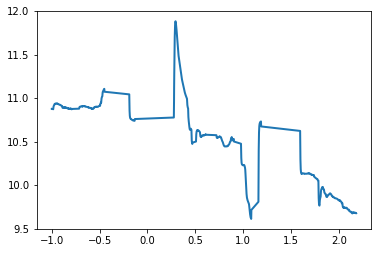

In [12]:
id1 = 20
plt.plot(df_fulldata.Time[df_fulldata.ID == id1], df_fulldata.R4[df_fulldata.ID == id1], linewidth=2.0)

In [13]:
x_axis = np.arange(len(df_fulldata.ID))
#x = np.arange(len(y))

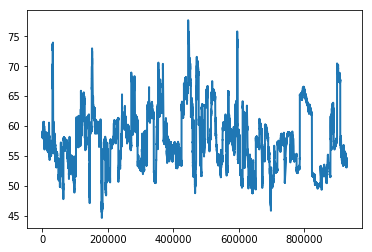

In [14]:
plt.plot(x_axis, df_fulldata.Humidity, linewidth=2.0)


In [15]:
print(df_dataset.shape)

(928991, 12)


In [16]:
df_fulldata.Time[df_fulldata.ID == id1].shape

(6174,)

In [17]:
for k in range(100):
    print(df_fulldata.Time[df_fulldata.ID == k].shape)

(12815,)
(8914,)
(9498,)
(9309,)
(5396,)
(8402,)
(10530,)
(8754,)
(11326,)
(8137,)
(10190,)
(6526,)
(8488,)
(7655,)
(4922,)
(8515,)
(11855,)
(9419,)
(8709,)
(8781,)
(6174,)
(8306,)
(7882,)
(7354,)
(11079,)
(13441,)
(8149,)
(11039,)
(9140,)
(11276,)
(8639,)
(9184,)
(14148,)
(7565,)
(8535,)
(9225,)
(11212,)
(12349,)
(15393,)
(13174,)
(8916,)
(8676,)
(9035,)
(8460,)
(8902,)
(9849,)
(10206,)
(8391,)
(8134,)
(7878,)
(7915,)
(8415,)
(10492,)
(8579,)
(9982,)
(9192,)
(8898,)
(13140,)
(9090,)
(11175,)
(8798,)
(10655,)
(9075,)
(8321,)
(8255,)
(8284,)
(9355,)
(10121,)
(12430,)
(10658,)
(8304,)
(8679,)
(10190,)
(9310,)
(8442,)
(10138,)
(3825,)
(8643,)
(10101,)
(9519,)
(7613,)
(9626,)
(9511,)
(9822,)
(9339,)
(9882,)
(8917,)
(8679,)
(8358,)
(8985,)
(9279,)
(9372,)
(10018,)
(10496,)
(9952,)
(0,)
(10342,)
(9724,)
(9689,)
(9554,)


### Plots of 8 MOX Sensors with respect to Time for Banana, Wine and Background

Text(0,0.5,'Values(kOhm)')

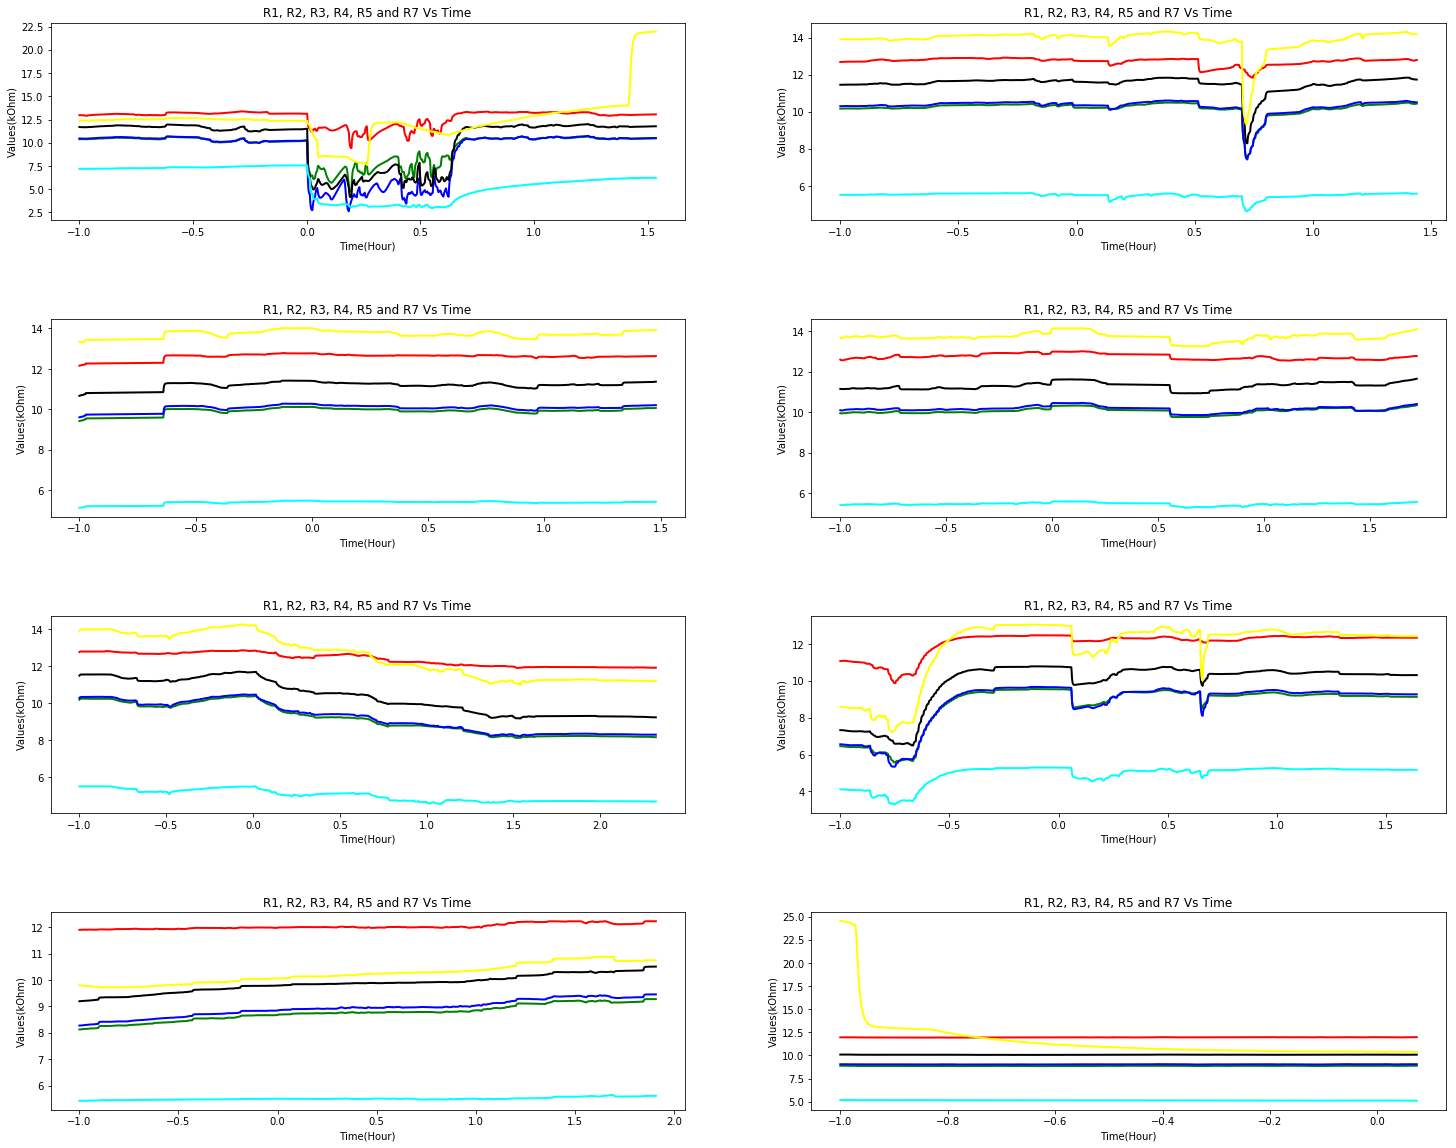

In [18]:
fig, axes = plt.subplots(nrows = 4, ncols = 2)
fig.set_figheight(20)
fig.set_figwidth(25)
fig.subplots_adjust(hspace = 0.5)
id1 = 1  # Wine
id2 = 18 # Banana
id3 = 13 # Banana
id4 = 15 # Banana
id5 = 16 # Banana
id6 = 17 # Banana
id7 = 78 # Background
id8 = 76 # Background

axes[0,0].plot(df_fulldata.Time[df_fulldata.ID == id1], df_fulldata.R1[df_fulldata.ID == id1],c = 'red',linewidth = '2.0',label = 'R1')
axes[0,0].plot(df_fulldata.Time[df_fulldata.ID == id1], df_fulldata.R2[df_fulldata.ID == id1],c = 'green',linewidth = '2.0',label = 'R2')
axes[0,0].plot(df_fulldata.Time[df_fulldata.ID == id1], df_fulldata.R3[df_fulldata.ID == id1],c = 'blue',linewidth = '2.0',label = 'R3')
axes[0,0].plot(df_fulldata.Time[df_fulldata.ID == id1], df_fulldata.R4[df_fulldata.ID == id1],c = 'black',linewidth = '2.0',label = 'R4')
axes[0,0].plot(df_fulldata.Time[df_fulldata.ID == id1], df_fulldata.R5[df_fulldata.ID == id1],c = 'yellow',linewidth = '2.0',label = 'R3')
axes[0,0].plot(df_fulldata.Time[df_fulldata.ID == id1], df_fulldata.R7[df_fulldata.ID == id1],c = 'cyan',linewidth = '2.0',label = 'R4')
axes[0,0].set_title('R1, R2, R3, R4, R5 and R7 Vs Time')
axes[0,0].set_xlabel('Time(Hour)')
axes[0,0].set_ylabel('Values(kOhm)')

axes[0,1].plot(df_fulldata.Time[df_fulldata.ID == id2], df_fulldata.R1[df_fulldata.ID == id2],c = 'red',linewidth = '2.0',label = 'R1')
axes[0,1].plot(df_fulldata.Time[df_fulldata.ID == id2], df_fulldata.R2[df_fulldata.ID == id2],c = 'green',linewidth = '2.0',label = 'R2')
axes[0,1].plot(df_fulldata.Time[df_fulldata.ID == id2], df_fulldata.R3[df_fulldata.ID == id2],c = 'blue',linewidth = '2.0',label = 'R3')
axes[0,1].plot(df_fulldata.Time[df_fulldata.ID == id2], df_fulldata.R4[df_fulldata.ID == id2],c = 'black',linewidth = '2.0',label = 'R4')
axes[0,1].plot(df_fulldata.Time[df_fulldata.ID == id2], df_fulldata.R5[df_fulldata.ID == id2],c = 'yellow',linewidth = '2.0',label = 'R3')
axes[0,1].plot(df_fulldata.Time[df_fulldata.ID == id2], df_fulldata.R7[df_fulldata.ID == id2],c = 'cyan',linewidth = '2.0',label = 'R4')
axes[0,1].set_title('R1, R2, R3, R4, R5 and R7 Vs Time')
axes[0,1].set_xlabel('Time(Hour)')
axes[0,1].set_ylabel('Values(kOhm)')

axes[1,0].plot(df_fulldata.Time[df_fulldata.ID == id3], df_fulldata.R1[df_fulldata.ID == id3],c = 'red',linewidth = '2.0',label = 'R1')
axes[1,0].plot(df_fulldata.Time[df_fulldata.ID == id3], df_fulldata.R2[df_fulldata.ID == id3],c = 'green',linewidth = '2.0',label = 'R2')
axes[1,0].plot(df_fulldata.Time[df_fulldata.ID == id3], df_fulldata.R3[df_fulldata.ID == id3],c = 'blue',linewidth = '2.0',label = 'R3')
axes[1,0].plot(df_fulldata.Time[df_fulldata.ID == id3], df_fulldata.R4[df_fulldata.ID == id3],c = 'black',linewidth = '2.0',label = 'R4')
axes[1,0].plot(df_fulldata.Time[df_fulldata.ID == id3], df_fulldata.R5[df_fulldata.ID == id3],c = 'yellow',linewidth = '2.0',label = 'R3')
axes[1,0].plot(df_fulldata.Time[df_fulldata.ID == id3], df_fulldata.R7[df_fulldata.ID == id3],c = 'cyan',linewidth = '2.0',label = 'R4')
axes[1,0].set_title('R1, R2, R3, R4, R5 and R7 Vs Time')
axes[1,0].set_xlabel('Time(Hour)')
axes[1,0].set_ylabel('Values(kOhm)')

axes[1,1].plot(df_fulldata.Time[df_fulldata.ID == id4], df_fulldata.R1[df_fulldata.ID == id4],c = 'red',linewidth = '2.0',label = 'R1')
axes[1,1].plot(df_fulldata.Time[df_fulldata.ID == id4], df_fulldata.R2[df_fulldata.ID == id4],c = 'green',linewidth = '2.0',label = 'R2')
axes[1,1].plot(df_fulldata.Time[df_fulldata.ID == id4], df_fulldata.R3[df_fulldata.ID == id4],c = 'blue',linewidth = '2.0',label = 'R3')
axes[1,1].plot(df_fulldata.Time[df_fulldata.ID == id4], df_fulldata.R4[df_fulldata.ID == id4],c = 'black',linewidth = '2.0',label = 'R4')
axes[1,1].plot(df_fulldata.Time[df_fulldata.ID == id4], df_fulldata.R5[df_fulldata.ID == id4],c = 'yellow',linewidth = '2.0',label = 'R3')
axes[1,1].plot(df_fulldata.Time[df_fulldata.ID == id4], df_fulldata.R7[df_fulldata.ID == id4],c = 'cyan',linewidth = '2.0',label = 'R4')
axes[1,1].set_title('R1, R2, R3, R4, R5 and R7 Vs Time')
axes[1,1].set_xlabel('Time(Hour)')
axes[1,1].set_ylabel('Values(kOhm)')

axes[2,0].plot(df_fulldata.Time[df_fulldata.ID == id5], df_fulldata.R1[df_fulldata.ID == id5],c = 'red',linewidth = '2.0',label = 'R1')
axes[2,0].plot(df_fulldata.Time[df_fulldata.ID == id5], df_fulldata.R2[df_fulldata.ID == id5],c = 'green',linewidth = '2.0',label = 'R2')
axes[2,0].plot(df_fulldata.Time[df_fulldata.ID == id5], df_fulldata.R3[df_fulldata.ID == id5],c = 'blue',linewidth = '2.0',label = 'R3')
axes[2,0].plot(df_fulldata.Time[df_fulldata.ID == id5], df_fulldata.R4[df_fulldata.ID == id5],c = 'black',linewidth = '2.0',label = 'R4')
axes[2,0].plot(df_fulldata.Time[df_fulldata.ID == id5], df_fulldata.R5[df_fulldata.ID == id5],c = 'yellow',linewidth = '2.0',label = 'R3')
axes[2,0].plot(df_fulldata.Time[df_fulldata.ID == id5], df_fulldata.R7[df_fulldata.ID == id5],c = 'cyan',linewidth = '2.0',label = 'R4')
axes[2,0].set_title('R1, R2, R3, R4, R5 and R7 Vs Time')
axes[2,0].set_xlabel('Time(Hour)')
axes[2,0].set_ylabel('Values(kOhm)')

axes[2,1].plot(df_fulldata.Time[df_fulldata.ID == id6], df_fulldata.R1[df_fulldata.ID == id6],c = 'red',linewidth = '2.0',label = 'R1')
axes[2,1].plot(df_fulldata.Time[df_fulldata.ID == id6], df_fulldata.R2[df_fulldata.ID == id6],c = 'green',linewidth = '2.0',label = 'R2')
axes[2,1].plot(df_fulldata.Time[df_fulldata.ID == id6], df_fulldata.R3[df_fulldata.ID == id6],c = 'blue',linewidth = '2.0',label = 'R3')
axes[2,1].plot(df_fulldata.Time[df_fulldata.ID == id6], df_fulldata.R4[df_fulldata.ID == id6],c = 'black',linewidth = '2.0',label = 'R4')
axes[2,1].plot(df_fulldata.Time[df_fulldata.ID == id6], df_fulldata.R5[df_fulldata.ID == id6],c = 'yellow',linewidth = '2.0',label = 'R3')
axes[2,1].plot(df_fulldata.Time[df_fulldata.ID == id6], df_fulldata.R7[df_fulldata.ID == id6],c = 'cyan',linewidth = '2.0',label = 'R4')
axes[2,1].set_title('R1, R2, R3, R4, R5 and R7 Vs Time')
axes[2,1].set_xlabel('Time(Hour)')
axes[2,1].set_ylabel('Values(kOhm)')

axes[3,0].plot(df_fulldata.Time[df_fulldata.ID == id7], df_fulldata.R1[df_fulldata.ID == id7],c = 'red',linewidth = '2.0',label = 'R1')
axes[3,0].plot(df_fulldata.Time[df_fulldata.ID == id7], df_fulldata.R2[df_fulldata.ID == id7],c = 'green',linewidth = '2.0',label = 'R2')
axes[3,0].plot(df_fulldata.Time[df_fulldata.ID == id7], df_fulldata.R3[df_fulldata.ID == id7],c = 'blue',linewidth = '2.0',label = 'R3')
axes[3,0].plot(df_fulldata.Time[df_fulldata.ID == id7], df_fulldata.R4[df_fulldata.ID == id7],c = 'black',linewidth = '2.0',label = 'R4')
axes[3,0].plot(df_fulldata.Time[df_fulldata.ID == id7], df_fulldata.R5[df_fulldata.ID == id7],c = 'yellow',linewidth = '2.0',label = 'R3')
axes[3,0].plot(df_fulldata.Time[df_fulldata.ID == id7], df_fulldata.R7[df_fulldata.ID == id7],c = 'cyan',linewidth = '2.0',label = 'R4')
axes[3,0].set_title('R1, R2, R3, R4, R5 and R7 Vs Time')
axes[3,0].set_xlabel('Time(Hour)')
axes[3,0].set_ylabel('Values(kOhm)')

axes[3,1].plot(df_fulldata.Time[df_fulldata.ID == id8], df_fulldata.R1[df_fulldata.ID == id8],c = 'red',linewidth = '2.0',label = 'R1')
axes[3,1].plot(df_fulldata.Time[df_fulldata.ID == id8], df_fulldata.R2[df_fulldata.ID == id8],c = 'green',linewidth = '2.0',label = 'R2')
axes[3,1].plot(df_fulldata.Time[df_fulldata.ID == id8], df_fulldata.R3[df_fulldata.ID == id8],c = 'blue',linewidth = '2.0',label = 'R3')
axes[3,1].plot(df_fulldata.Time[df_fulldata.ID == id8], df_fulldata.R4[df_fulldata.ID == id8],c = 'black',linewidth = '2.0',label = 'R4')
axes[3,1].plot(df_fulldata.Time[df_fulldata.ID == id8], df_fulldata.R5[df_fulldata.ID == id8],c = 'yellow',linewidth = '2.0',label = 'R3')
axes[3,1].plot(df_fulldata.Time[df_fulldata.ID == id8], df_fulldata.R7[df_fulldata.ID == id8],c = 'cyan',linewidth = '2.0',label = 'R4')
axes[3,1].set_title('R1, R2, R3, R4, R5 and R7 Vs Time')
axes[3,1].set_xlabel('Time(Hour)')
axes[3,1].set_ylabel('Values(kOhm)')

Comparing wine with Banana for each sensor differently

Text(0,0.5,'Values(kOhm)')

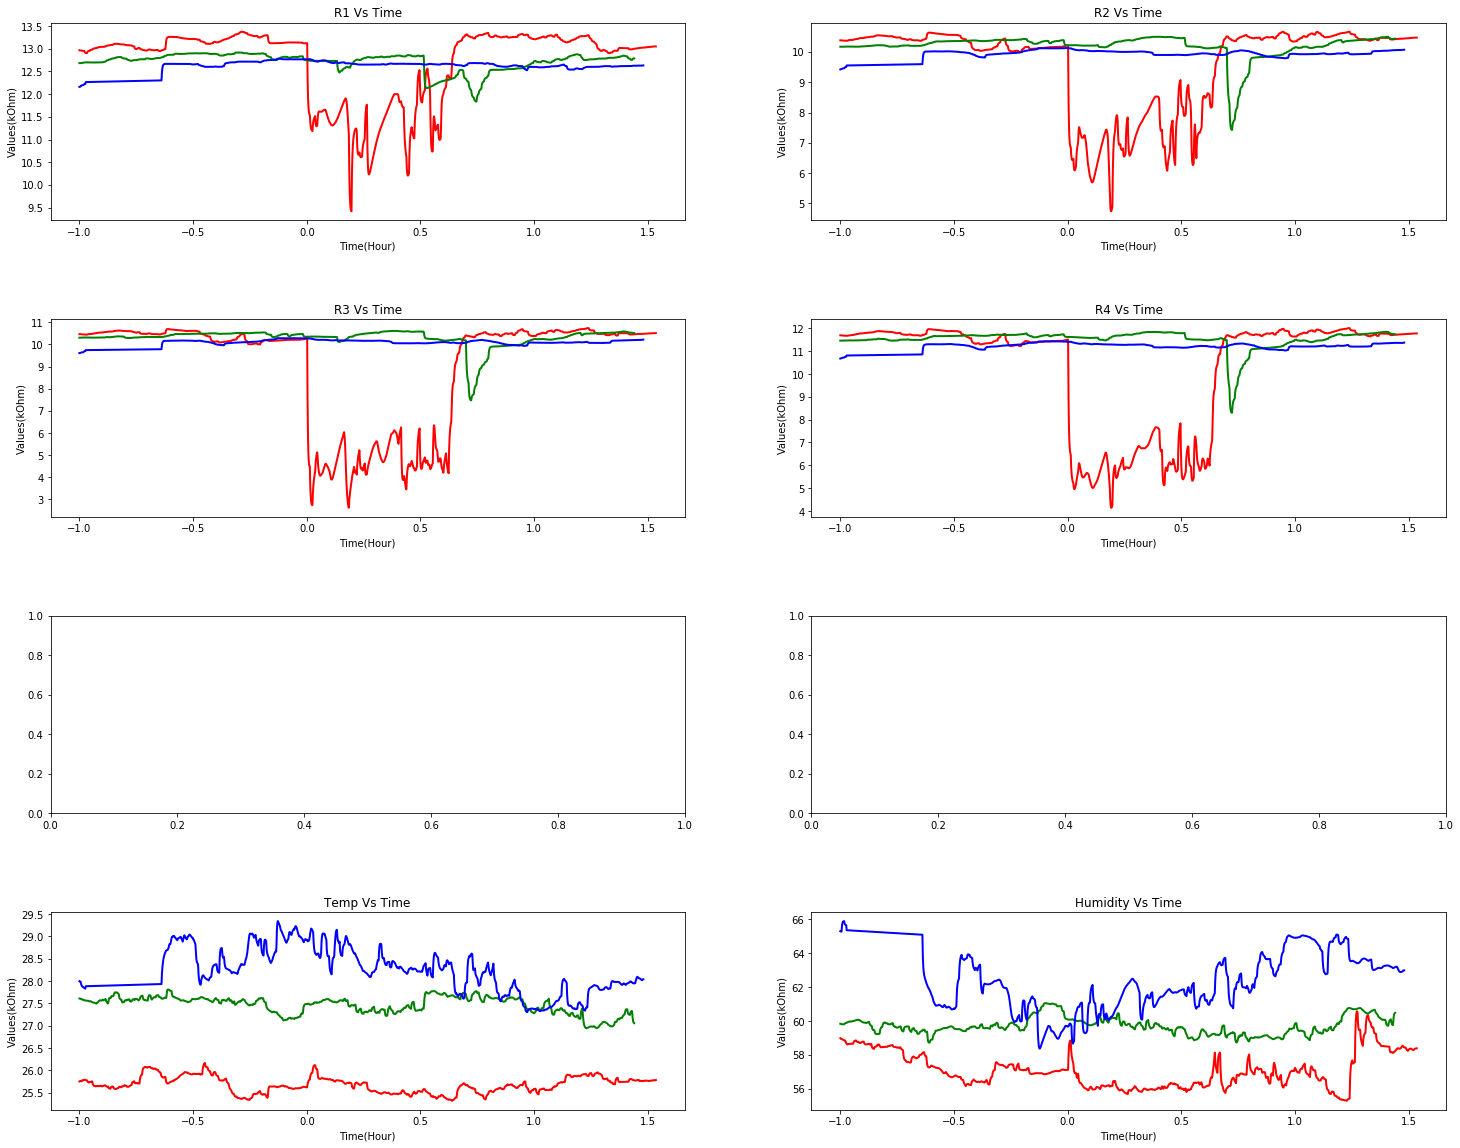

In [19]:
fig, axes = plt.subplots(nrows = 4, ncols = 2)
fig.set_figheight(20)
fig.set_figwidth(25)
fig.subplots_adjust(hspace = 0.5)
id1 = 1  # Wine
id2 = 18 # Banana
id3 = 13 # Banana
id4 = 15 # Banana
id5 = 16 # Banana
id6 = 17 # Banana
id7 = 78 # Background
id8 = 76 # Background

axes[0,0].plot(df_fulldata.Time[df_fulldata.ID == id1], df_fulldata.R1[df_fulldata.ID == id1],c = 'red',linewidth = '2.0',label = 'ID1')
axes[0,0].plot(df_fulldata.Time[df_fulldata.ID == id2], df_fulldata.R1[df_fulldata.ID == id2],c = 'green',linewidth = '2.0',label = 'ID2')
axes[0,0].plot(df_fulldata.Time[df_fulldata.ID == id3], df_fulldata.R1[df_fulldata.ID == id3],c = 'blue',linewidth = '2.0',label = 'ID3')
axes[0,0].set_title('R1 Vs Time')
axes[0,0].set_xlabel('Time(Hour)')
axes[0,0].set_ylabel('Values(kOhm)')

axes[0,1].plot(df_fulldata.Time[df_fulldata.ID == id1], df_fulldata.R2[df_fulldata.ID == id1],c = 'red',linewidth = '2.0',label = 'ID1')
axes[0,1].plot(df_fulldata.Time[df_fulldata.ID == id2], df_fulldata.R2[df_fulldata.ID == id2],c = 'green',linewidth = '2.0',label = 'ID2')
axes[0,1].plot(df_fulldata.Time[df_fulldata.ID == id3], df_fulldata.R2[df_fulldata.ID == id3],c = 'blue',linewidth = '2.0',label = 'ID3')
axes[0,1].set_title('R2 Vs Time')
axes[0,1].set_xlabel('Time(Hour)')
axes[0,1].set_ylabel('Values(kOhm)')

axes[1,0].plot(df_fulldata.Time[df_fulldata.ID == id1], df_fulldata.R3[df_fulldata.ID == id1],c = 'red',linewidth = '2.0',label = 'ID1')
axes[1,0].plot(df_fulldata.Time[df_fulldata.ID == id2], df_fulldata.R3[df_fulldata.ID == id2],c = 'green',linewidth = '2.0',label = 'ID2')
axes[1,0].plot(df_fulldata.Time[df_fulldata.ID == id3], df_fulldata.R3[df_fulldata.ID == id3],c = 'blue',linewidth = '2.0',label = 'ID3')
axes[1,0].set_title('R3 Vs Time')
axes[1,0].set_xlabel('Time(Hour)')
axes[1,0].set_ylabel('Values(kOhm)')

axes[1,1].plot(df_fulldata.Time[df_fulldata.ID == id1], df_fulldata.R4[df_fulldata.ID == id1],c = 'red',linewidth = '2.0',label = 'ID1')
axes[1,1].plot(df_fulldata.Time[df_fulldata.ID == id2], df_fulldata.R4[df_fulldata.ID == id2],c = 'green',linewidth = '2.0',label = 'ID2')
axes[1,1].plot(df_fulldata.Time[df_fulldata.ID == id3], df_fulldata.R4[df_fulldata.ID == id3],c = 'blue',linewidth = '2.0',label = 'ID3')
axes[1,1].set_title('R4 Vs Time')
axes[1,1].set_xlabel('Time(Hour)')
axes[1,1].set_ylabel('Values(kOhm)')

"""
axes[2,0].plot(df_fulldata.Time[df_fulldata.ID == id1], df_fulldata.R5[df_fulldata.ID == id1],c = 'red',linewidth = '2.0',label = 'ID1')
axes[2,0].plot(df_fulldata.Time[df_fulldata.ID == id2], df_fulldata.R5[df_fulldata.ID == id2],c = 'green',linewidth = '2.0',label = 'ID2')
axes[2,0].plot(df_fulldata.Time[df_fulldata.ID == id3], df_fulldata.R5[df_fulldata.ID == id3],c = 'blue',linewidth = '2.0',label = 'ID3')
axes[2,0].plot(df_fulldata.Time[df_fulldata.ID == id8], df_fulldata.R6[df_fulldata.ID == id1],c = 'black',linewidth = '2.0',label = 'ID1')
axes[2,0].plot(df_fulldata.Time[df_fulldata.ID == id8], df_fulldata.R6[df_fulldata.ID == id2],c = 'yellow',linewidth = '2.0',label = 'ID2')
axes[2,0].plot(df_fulldata.Time[df_fulldata.ID == id8], df_fulldata.R6[df_fulldata.ID == id3],c = 'cyan',linewidth = '2.0',label = 'ID3')
axes[2,0].set_title('R5, R6 Vs Time')
axes[2,0].set_xlabel('Time(Hour)')
axes[2,0].set_ylabel('Values(kOhm)')

axes[2,1].plot(df_fulldata.Time[df_fulldata.ID == id1], df_fulldata.R7[df_fulldata.ID == id1],c = 'red',linewidth = '2.0',label = 'ID1')
axes[2,1].plot(df_fulldata.Time[df_fulldata.ID == id2], df_fulldata.R7[df_fulldata.ID == id2],c = 'green',linewidth = '2.0',label = 'ID2')
axes[2,1].plot(df_fulldata.Time[df_fulldata.ID == id3], df_fulldata.R7[df_fulldata.ID == id3],c = 'blue',linewidth = '2.0',label = 'ID3')
axes[2,1].plot(df_fulldata.Time[df_fulldata.ID == id8], df_fulldata.R8[df_fulldata.ID == id1],c = 'black',linewidth = '2.0',label = 'ID1')
axes[2,1].plot(df_fulldata.Time[df_fulldata.ID == id8], df_fulldata.R8[df_fulldata.ID == id2],c = 'yellow',linewidth = '2.0',label = 'ID2')
axes[2,1].plot(df_fulldata.Time[df_fulldata.ID == id8], df_fulldata.R8[df_fulldata.ID == id3],c = 'cyan',linewidth = '2.0',label = 'ID3')
axes[2,1].set_title('R7, R8 Vs Time')
axes[2,1].set_xlabel('Time(Hour)')
axes[2,1].set_ylabel('Values(kOhm)')
"""

axes[3,0].plot(df_fulldata.Time[df_fulldata.ID == id1], df_fulldata.Temp[df_fulldata.ID == id1],c = 'red',linewidth = '2.0',label = 'ID1')
axes[3,0].plot(df_fulldata.Time[df_fulldata.ID == id2], df_fulldata.Temp[df_fulldata.ID == id2],c = 'green',linewidth = '2.0',label = 'ID2')
axes[3,0].plot(df_fulldata.Time[df_fulldata.ID == id3], df_fulldata.Temp[df_fulldata.ID == id3],c = 'blue',linewidth = '2.0',label = 'ID3')
axes[3,0].set_title('Temp Vs Time')
axes[3,0].set_xlabel('Time(Hour)')
axes[3,0].set_ylabel('Values(kOhm)')

axes[3,1].plot(df_fulldata.Time[df_fulldata.ID == id1], df_fulldata.Humidity[df_fulldata.ID == id1],c = 'red',linewidth = '2.0',label = 'ID1')
axes[3,1].plot(df_fulldata.Time[df_fulldata.ID == id2], df_fulldata.Humidity[df_fulldata.ID == id2],c = 'green',linewidth = '2.0',label = 'ID2')
axes[3,1].plot(df_fulldata.Time[df_fulldata.ID == id3], df_fulldata.Humidity[df_fulldata.ID == id3],c = 'blue',linewidth = '2.0',label = 'ID3')
axes[3,1].set_title('Humidity Vs Time')
axes[3,1].set_xlabel('Time(Hour)')
axes[3,1].set_ylabel('Values(kOhm)')

In [20]:
from scipy import stats

In [21]:
x = np.random.random(10)
y = np.random.random(10)
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [22]:
p_value

0.7776267515009825

In [27]:
x_val = df_fulldata.R1.values

In [28]:
y_val = df_fulldata.Class.values

In [29]:
x_val.shape

(928991,)

In [30]:
y_val.shape

(928991,)

In [31]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x_val,y_val)
print(p_value)

0.0


In [36]:
y_val = df_fulldata.Class.values
x_val = df_fulldata.R1.values
slope, intercept, r_value, p_value, std_err = stats.linregress(y_val,x_val)
print(r_value)

0.20816443511908486


In [26]:
df_fulldata.shape
newDf = df_fulldata.iloc[:,6:]
newDf2 = df_fulldata.iloc[:,2]
print(newDf2.head())

0    1
1    1
2    1
3    1
4    1
Name: Class, dtype: int64


In [28]:
class_val = newDf2.values
data_val = newDf.values

In [141]:
df_fulldata

,ID,Class,Time,R1,R5,R6,R7,R8,Temp,Humidity
0,0.0,1,-0.999750,12.8621,13.4931,13.3423,8.04169,8.73901,26.2257,59.0528
1,0.0,1,-0.999472,12.8617,13.4927,13.3412,8.04133,8.73908,26.2308,59.0299
2,0.0,1,-0.999194,12.8607,13.4924,13.3405,8.04101,8.73915,26.2365,59.0093
3,0.0,1,-0.998916,12.8602,13.4921,13.3398,8.04086,8.73936,26.2416,58.9905
4,0.0,1,-0.998627,12.8595,13.4919,13.3390,8.04087,8.73986,26.2462,58.9736
5,0.0,1,-0.998349,12.8594,13.4921,13.3382,8.04088,8.74016,26.2503,58.9583
6,0.0,1,-0.998071,12.8595,13.4919,13.3377,8.04060,8.74013,26.2541,58.9445
7,0.0,1,-0.997793,12.8587,13.4916,13.3371,8.04063,8.73963,26.2575,58.9319
8,0.0,1,-0.997515,12.8579,13.4914,13.3365,8.04009,8.73949,26.2606,58.9206
9,0.0,1,-0.997227,12.8573,13.4912,13.3364,8.03989,8.73937,26.2626,58.9103


In [29]:
data_val

array([[12.8621 , 10.3683 , 10.4383 , ...,  8.73901, 26.2257 , 59.0528 ],
       [12.8617 , 10.3682 , 10.4375 , ...,  8.73908, 26.2308 , 59.0299 ],
       [12.8607 , 10.3686 , 10.437  , ...,  8.73915, 26.2365 , 59.0093 ],
       ...,
       [12.6244 , 10.5795 , 10.7437 , ...,  7.05967, 27.7339 , 54.1324 ],
       [12.6243 , 10.5797 , 10.744  , ...,  7.05969, 27.7364 , 54.1235 ],
       [12.6248 , 10.5791 , 10.744  , ...,  7.05944, 27.7385 , 54.1154 ]])

In [23]:
from sklearn.model_selection import train_test_split

In [30]:
x_train, x_test, y_train, y_test = train_test_split(data_val, class_val, test_size = 0.2)   

In [31]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [58]:
svc = SVC()
svc.fit(x_train, y_train)
prediction = svc.predict(x_test)
cm = confusion_matrix(y_test, prediction)
sum = 0
for i in range(cm.shape[0]):
    sum += cm[i][i]
    
accuracy = sum/x_test.shape[0]                
print(accuracy)


/home/nrvptl/.local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9801344463640816


In [59]:
df_fulldata.head()

,ID,Date,Class,t0,dt,Time,R1,R2,R3,R4,R5,R6,R7,R8,Temp,Humidity
0,0,07-04-15,1,13.49,1.64,-0.999750,12.8621,10.3683,10.4383,11.6699,13.4931,13.3423,8.04169,8.73901,26.2257,59.0528
1,0,07-04-15,1,13.49,1.64,-0.999472,12.8617,10.3682,10.4375,11.6697,13.4927,13.3412,8.04133,8.73908,26.2308,59.0299
2,0,07-04-15,1,13.49,1.64,-0.999194,12.8607,10.3686,10.4370,11.6696,13.4924,13.3405,8.04101,8.73915,26.2365,59.0093
3,0,07-04-15,1,13.49,1.64,-0.998916,12.8602,10.3686,10.4370,11.6697,13.4921,13.3398,8.04086,8.73936,26.2416,58.9905
4,0,07-04-15,1,13.49,1.64,-0.998627,12.8595,10.3688,10.4374,11.6699,13.4919,13.3390,8.04087,8.73986,26.2462,58.9736


In [32]:
df_fulldata.drop(['Date', 't0', 'dt'],axis = 1, inplace=True)

In [33]:
corr = df_fulldata.corr()

In [34]:
import seaborn as sns

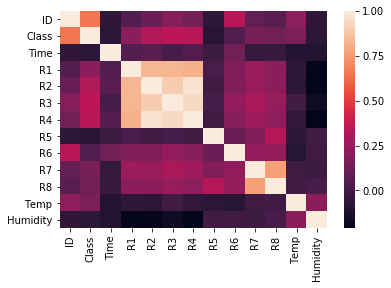

In [35]:
sns.heatmap(corr)

In [36]:
corr

,ID,Class,Time,R1,R2,R3,R4,R5,R6,R7,R8,Temp,Humidity
ID,1.000000,0.653916,-0.056593,0.049594,0.118749,0.196694,0.152847,-0.061231,0.334091,0.098402,0.064075,0.223035,-0.055862
Class,0.653916,1.000000,-0.078356,0.208164,0.319272,0.351099,0.333775,-0.081953,0.043721,0.158807,0.136204,0.165092,-0.069220
Time,-0.056593,-0.078356,1.000000,0.044143,0.068856,0.012146,0.053263,-0.014165,0.135431,-0.038584,-0.034330,-0.096683,-0.098006
R1,0.049594,0.208164,0.044143,1.000000,0.829782,0.830017,0.815452,0.023163,0.179294,0.261193,0.210106,-0.061570,-0.197800
R2,0.118749,0.319272,0.068856,0.829782,1.000000,0.904101,0.970727,0.000083,0.179965,0.251888,0.212323,-0.071798,-0.197358
R3,0.196694,0.351099,0.012146,0.830017,0.904101,1.000000,0.938719,0.011904,0.230779,0.300779,0.247322,-0.005071,-0.164143
R4,0.152847,0.333775,0.053263,0.815452,0.970727,0.938719,1.000000,-0.001982,0.201893,0.269640,0.222034,-0.054750,-0.211453
R5,-0.061231,-0.081953,-0.014165,0.023163,0.000083,0.011904,-0.001982,1.000000,0.117357,0.184570,0.329771,-0.067408,0.001222
R6,0.334091,0.043721,0.135431,0.179294,0.179965,0.230779,0.201893,0.117357,1.000000,0.232124,0.237968,-0.085537,-0.009581
R7,0.098402,0.158807,-0.038584,0.261193,0.251888,0.300779,0.269640,0.184570,0.232124,1.000000,0.763631,-0.009134,-0.020658


In [37]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [38]:
label_encoder = LabelEncoder()
df_fulldata.iloc[:,0] = label_encoder.fit_transform(df_fulldata.iloc[:,0]).astype('float64')

cols = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.8:
            if cols[j]:
                cols[j] = False
sel_cols = df_fulldata.columns[cols]
df_fulldata = df_fulldata[sel_cols]

In [39]:
sel_cols = sel_cols[1:].values
import statsmodels.formula.api as sm

In [40]:
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns

In [41]:
SL = 0.05
data_modeled, sel_cols = backwardElimination(df_fulldata.iloc[:,1:].values, df_fulldata.iloc[:,0].values, SL, sel_cols)

In [42]:
result = pd.DataFrame()
result['diagnosis'] = df_fulldata.iloc[:,0]

In [43]:
data = pd.DataFrame(data = data_modeled, columns = sel_cols)

In [131]:
result.values.shape

(928991, 1)

In [132]:
type(result)

pandas.core.frame.DataFrame

In [134]:
y_test_fea.shape

(185799, 1)

In [135]:
data.values.shape

(928991, 9)

In [44]:
data.head()

,Class,Time,R1,R5,R6,R7,R8,Temp,Humidity
0,1.0,-0.999750,12.8621,13.4931,13.3423,8.04169,8.73901,26.2257,59.0528
1,1.0,-0.999472,12.8617,13.4927,13.3412,8.04133,8.73908,26.2308,59.0299
2,1.0,-0.999194,12.8607,13.4924,13.3405,8.04101,8.73915,26.2365,59.0093
3,1.0,-0.998916,12.8602,13.4921,13.3398,8.04086,8.73936,26.2416,58.9905
4,1.0,-0.998627,12.8595,13.4919,13.3390,8.04087,8.73986,26.2462,58.9736


In [45]:
x_train_fea, x_test_fea, y_train_fea, y_test_fea = train_test_split(data.values, result.values, test_size = 0.2)

In [106]:
svc=SVC() # The default kernel used by SVC is the gaussian kernel
svc.fit(x_train_fea, y_train_fea)

/home/nrvptl/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nrvptl/.local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [107]:
prediction = svc.predict(x_test_fea)

In [108]:
cm = confusion_matrix(y_test_fea, prediction)
sum = 0
for i in range(cm.shape[0]):
    sum += cm[i][i]
    
accuracy = sum/x_test.shape[0]
print(accuracy)

0.9997362741457166


# Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
rf = RandomForestClassifier(n_estimators = 100)

In [43]:
rf.fit(x_train_fea, y_train_fea)

/home/nrvptl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [45]:
prediction = rf.predict(x_test_fea)

In [46]:
cm = confusion_matrix(y_test_fea, prediction)
sum = 0
for i in range(cm.shape[0]):
    sum += cm[i][i]
    
accuracy = sum/x_test.shape[0]
print(accuracy)

0.999989235679417


# #Removing Extra Noise Samples

In [ ]:
pre = 3000
post = 5000
cutbgrd = lambda df: df[hour:-hour]

grby = dataset.groupby('id')
df = grby.apply(cutbgrd)

cols = df.columns
lst = cols.to_list()
lst[ lst.index('id') ] = 'I_D'
df.columns = lst

df.reset_index( inplace=True)
df.drop( columns=['I_D', 'level_1'], inplace=True)
df.tail()

In [11]:
months = ['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug','Sep', 'Oct', 'Nov', 'Dec']

In [10]:
hour = 32
cutbgrd = lambda df: df[hour:-hour]

#grby = dataset.groupby('id')
df = testrange.apply(cutbgrd)

AttributeError: 'list' object has no attribute 'apply'

In [12]:
Days = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

In [15]:
test_df = pd.DataFrame()

In [16]:
test_df['Month'] = months
test_df['Days'] = Days

In [17]:
hour = 3
cutbgrd = lambda df2: df2[hour:-hour]

#grby = dataset.groupby('id')
df2 = test_df.apply(cutbgrd)

In [18]:
df2

,Month,Days
3,April,30
4,May,31
5,June,30
6,July,31
7,Aug,31
8,Sep,30


In [93]:
from itertools import takewhile

def fnd_zero(l, b): return len([x for x in takewhile(lambda x: x[1] <= b, enumerate(l))])

In [96]:
pre_cut = 1000
post_cut = 5000
cutbgrd = lambda df, pre_cut, post_cut, key: df[key - pre_cut : key + post_cut]

In [106]:
NewDf_fulldata = pd.DataFrame()
for _, temp_df in df_fulldata.groupby('ID'):
    zero_loc = fnd_zero(temp_df.Time,0.0)
    #print(temp_df.shape)
    NewTemp_df = cutbgrd(temp_df, pre_cut, post_cut, zero_loc)
    #print(NewTemp_df.shape)
    frames = [NewDf_fulldata, NewTemp_df]
    NewDf_fulldata = pd.concat(frames)
NewDf_fulldata.head()


,ID,Class,Time,R1,R5,R6,R7,R8,Temp,Humidity
2429,0.0,1,-0.280824,13.0840,13.8121,13.6627,8.30774,9.01964,26.0514,58.7386
2430,0.0,1,-0.280546,13.0844,13.8137,13.6645,8.30791,9.01980,26.0484,58.7457
2431,0.0,1,-0.280268,13.0850,13.8152,13.6658,8.30835,9.01980,26.0457,58.7521
2432,0.0,1,-0.279979,13.0858,13.8162,13.6668,8.30802,9.01964,26.0432,58.7579
2433,0.0,1,-0.279701,13.0860,13.8172,13.6681,8.30817,9.01965,26.0410,58.7631


In [110]:
NewDf_fulldata.shape
newDf_data = NewDf_fulldata.iloc[:,3:]
newDf_class = NewDf_fulldata.iloc[:,1]
print(newDf_class.head())

2429    1
2430    1
2431    1
2432    1
2433    1
Name: Class, dtype: int64


In [111]:
NewClass_Val = newDf_class.values
NewData_Val = newDf_data.values

In [112]:
Newx_train, Newx_test, Newy_train, Newy_test = train_test_split(NewData_Val, NewClass_Val, test_size = 0.2)

In [113]:
import time

In [114]:
start = time.time()
svc=SVC() # The default kernel used by SVC is the gaussian kernel
svc.fit(Newx_train, Newy_train)
end = time.time()
print(end - start)

/home/nrvptl/.local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


2097.400220155716


In [115]:
start = time.time()
prediction = svc.predict(Newx_test)
end = time.time()
print(end - start)

78.68036437034607


In [116]:
start = time.time()
cm = confusion_matrix(Newy_test, prediction)
sum = 0
for i in range(cm.shape[0]):
    sum += cm[i][i]
    
accuracy = sum/x_test.shape[0]
print(accuracy)
end = time.time()
print(end - start)

0.6089322332197697
0.17104244232177734


In [117]:
pre_cut = 2000
post_cut = 8000
cutbgrd = lambda df, pre_cut, post_cut, key: df[key - pre_cut : key + post_cut]

NewDf_fulldata = pd.DataFrame()
for _, temp_df in df_fulldata.groupby('ID'):
    zero_loc = fnd_zero(temp_df.Time,0.0)
    #print(temp_df.shape)
    NewTemp_df = cutbgrd(temp_df, pre_cut, post_cut, zero_loc)
    #print(NewTemp_df.shape)
    frames = [NewDf_fulldata, NewTemp_df]
    NewDf_fulldata = pd.concat(frames)
NewDf_fulldata.head()

NewDf_fulldata.shape
newDf_data = NewDf_fulldata.iloc[:,3:]
newDf_class = NewDf_fulldata.iloc[:,1]

NewClass_Val = newDf_class.values
NewData_Val = newDf_data.values

Newx_train, Newx_test, Newy_train, Newy_test = train_test_split(NewData_Val, NewClass_Val, test_size = 0.2)



In [118]:
start = time.time()
svc=SVC() # The default kernel used by SVC is the gaussian kernel
svc.fit(Newx_train, Newy_train)
end = time.time()
print(end - start)

/home/nrvptl/.local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


5276.376909732819


In [119]:
start = time.time()
prediction = svc.predict(Newx_test)
end = time.time()
print(end - start)

259.98113489151


In [120]:
start = time.time()
cm = confusion_matrix(Newy_test, prediction)
sum = 0
for i in range(cm.shape[0]):
    sum += cm[i][i]
    
accuracy = sum/x_test.shape[0]
print(accuracy)
end = time.time()
print(end - start)

0.7930559367919096
0.24298739433288574


In [121]:
pre_cut = 50
#post_cut = 8000
cutbgrd = lambda df, pre_cut, key: df[key - pre_cut : -1]

NewDf_fulldata = pd.DataFrame()
for _, temp_df in df_fulldata.groupby('ID'):
    zero_loc = fnd_zero(temp_df.Time,0.0)
    #print(temp_df.shape)
    NewTemp_df = cutbgrd(temp_df, pre_cut, zero_loc)
    #print(NewTemp_df.shape)
    frames = [NewDf_fulldata, NewTemp_df]
    NewDf_fulldata = pd.concat(frames)
NewDf_fulldata.head()

NewDf_fulldata.shape
newDf_data = NewDf_fulldata.iloc[:,3:]
newDf_class = NewDf_fulldata.iloc[:,1]

NewClass_Val = newDf_class.values
NewData_Val = newDf_data.values

Newx_train, Newx_test, Newy_train, Newy_test = train_test_split(NewData_Val, NewClass_Val, test_size = 0.2)

In [122]:
start = time.time()
svc=SVC() # The default kernel used by SVC is the gaussian kernel
svc.fit(Newx_train, Newy_train)
end = time.time()
print(end - start)

/home/nrvptl/.local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


2138.094111442566


In [123]:
start = time.time()
prediction = svc.predict(Newx_test)
end = time.time()
print(end - start)

56.002870321273804


In [124]:
start = time.time()
cm = confusion_matrix(Newy_test, prediction)
sum = 0
for i in range(cm.shape[0]):
    sum += cm[i][i]
    
accuracy = sum/x_test.shape[0]
print(accuracy)
end = time.time()
print(end - start)

0.635466283456854
0.12349414825439453


In [126]:
NewData_Val.shape

(591420, 7)

In [128]:
NewClass_Val.shape

(591420,)

In [133]:
type(NewClass_Val)

numpy.ndarray